<a href="https://colab.research.google.com/github/singhsukhendra/MovieGenrePrediction/blob/master/MovieGenre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
#%matplotlib inline
import os


Using TensorFlow backend.


In [0]:
train = pd.read_csv("/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/train.csv") 


In [3]:
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [10]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg', target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)
train_image = []

y = np.array(train.drop(['Id', 'Genre'], axis=1))
y = y[:7254]
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


100%|██████████| 7254/7254 [00:41<00:00, 173.46it/s]


(7254, 25)


In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
#%matplotlib inline
import os
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))
print(model.summary())




W0813 14:22:12.757204 140099061606272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 14:22:12.815802 140099061606272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 14:22:12.823797 140099061606272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 14:22:12.863522 140099061606272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0813 14:22:12.869708 140099061606272 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 196, 196, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 43, 64)        51264     
__________

Train on 6528 samples, validate on 726 samples
Epoch 1/50
6528/6528 [==============================] - 10s 2ms/step - loss: 0.2169 - acc: 0.9191 - val_loss: 0.2361 - val_acc: 0.9115
Epoch 2/50
6528/6528 [==============================] - 9s 1ms/step - loss: 0.2132 - acc: 0.9202 - val_loss: 0.2380 - val_acc: 0.9122
Epoch 3/50
6528/6528 [==============================] - 9s 1ms/step - loss: 0.2094 - acc: 0.9212 - val_loss: 0.2399 - val_acc: 0.9113
Epoch 4/50
6528/6528 [==============================] - 9s 1ms/step - loss: 0.2075 - acc: 0.9221 - val_loss: 0.2384 - val_acc: 0.9118
Epoch 5/50
6528/6528 [==============================] - 9s 1ms/step - loss: 0.2037 - acc: 0.9232 - val_loss: 0.2396 - val_acc: 0.9125
Epoch 6/50
6528/6528 [==============================] - 9s 1ms/step - loss: 0.1999 - acc: 0.9243 - val_loss: 0.2436 - val_acc: 0.9119
Epoch 7/50
6528/6528 [==============================] - 9s 1ms/step - loss: 0.1973 - acc: 0.9253 - val_loss: 0.2436 - val_acc: 0.9122
Epoch 8/50
652

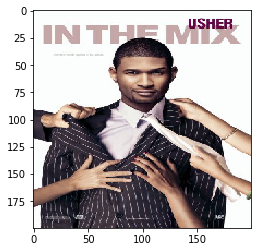

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelnew.h5")
print("Saved model to disk")


# In[ ]:

img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/newposter.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [25]:
from keras.models import load_model
from keras.models import model_from_json
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelnew.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
from keras.models import load_model
from keras.models import model_from_json
import json

model.load_weights('modelnew.h5')

Comedy (1.0)
Romance (0.615)
Fantasy (0.308)


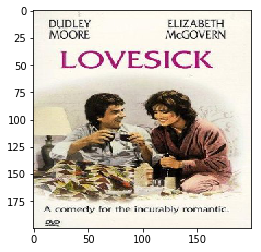

In [27]:
img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/unknown.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Drama (0.999)
Comedy (0.972)
Romance (0.912)


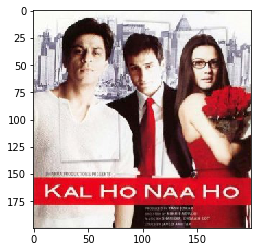

In [28]:
img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/kalhonaho.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Drama (0.543)
Documentary (0.233)
Action (0.209)


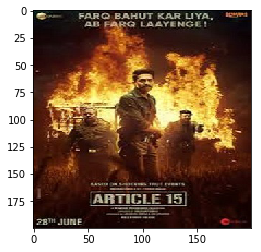

In [30]:
img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/article15.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Comedy (0.95)
Adventure (0.255)
Family (0.146)


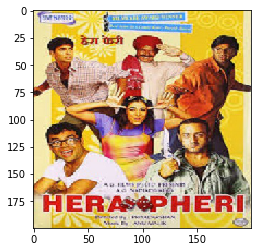

In [31]:
img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/herapheri.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

Drama (0.53)
Documentary (0.23)
Action (0.225)


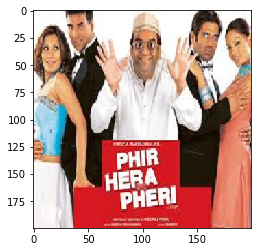

In [33]:
img = image.load_img('/content/drive/My Drive/movie genre/Multi_Label_dataset/Multi_Label_dataset/phirherapheri.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)